In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(1, '../squintsar/lib/')
from sar_geometry import *
from sar_functions import *
from supplemental import *

/Users/benhills/Software/MyGitRepos/squintsar/notebooks/../squintsar/lib/sar_geometry.py:104: ComplexWarning: Casting complex values to real discards the imaginary part
  s[i] = roots[np.argmin(abs(roots))]


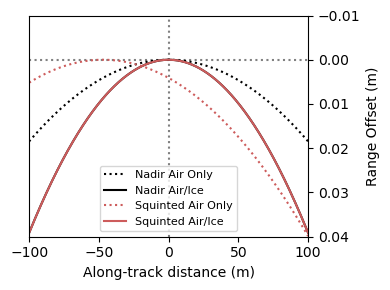

In [2]:
# measurements
c = 3e8
t0 = 3e-6
r0 = t0*c # range
h = 200 # height above ice surface
dx = .1 # spatial step
Xs = np.arange(-100.,100+dx,dx) # along-track distances within the aperture

# Initialize the figure
plt.figure(figsize=(4,3))
plt.axhline(0,color='grey',ls=':')
plt.axvline(0,color='grey',ls=':')

# air only so simple geometry
R1_air = (np.sqrt(r0**2.+Xs**2.) - r0)/c
plt.plot(Xs,R1_air*1e6,'k',ls=':',label='Nadir Air Only')

# with air/ice so ray bending
R1_ai = np.empty_like(Xs)
for j,xi in enumerate(Xs):
    R1_ai[j] = sar_raybend(t0, h, xi)
plt.plot(Xs,R1_ai*1e6,'k',label='Nadir Air/Ice')

### Now repeat with a squint ###
theta = -3.*np.pi/180.

# air only so simple geometry
# get along-track distance (x0) from center of aperture to target
x0 = r0*np.sin(theta)
h_air = r0*np.cos(theta)
R2_air = (np.sqrt(h_air**2.+(Xs-x0)**2.) - h_air)/c
plt.plot(Xs,R2_air*1e6,'indianred',ls=':',label='Squinted Air Only')

# with air/ice so ray bending
R2_ai = np.empty_like(Xs)
for j,xi in enumerate(Xs):
    R2_ai[j] = sar_raybend(t0, h, xi, theta)
plt.plot(Xs,R2_ai*1e6,'indianred',label='Squinted Air/Ice')

# polish plot and save
plt.legend(fontsize=8)
plt.ylim(.04,-.01)
plt.xlim(min(Xs),max(Xs))
plt.xlabel('Along-track distance (m)')
plt.ylabel('Range Offset (m)')
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.tight_layout()
plt.savefig('Range_Offsets.pdf')

/Users/benhills/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


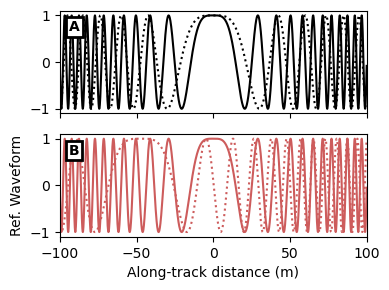

In [3]:
### Reference waveforms from range offset above

# initialize teh figure
plt.figure(figsize=(4,3))
ax1=plt.subplot(211)
plt.tick_params(labelbottom=False)
plt.xlim(min(Xs),max(Xs))
plt.text(0.03,0.8,'A',transform=ax1.transAxes,weight='bold',
        bbox=dict(facecolor='w', edgecolor='k',pad=2,lw=2))
ax2 = plt.subplot(212)
plt.xlim(min(Xs),max(Xs))
plt.xlabel('Along-track distance (m)')
plt.ylabel('Ref. Waveform')
plt.text(0.03,0.8,'B',transform=ax2.transAxes,weight='bold',
        bbox=dict(facecolor='w', edgecolor='k',pad=2,lw=2))

# unsquinted
C = matched_filter(r2p(R1_air))
ax1.plot(Xs,C,'k:')
C = matched_filter(r2p(R1_ai))
ax1.plot(Xs,C,'k-')

# squinted
C = matched_filter(r2p(R2_air))
ax2.plot(Xs,C,':',c='indianred')
C = matched_filter(r2p(R2_ai))
ax2.plot(Xs,C,'-',c='indianred')

# tighten up and save
plt.tight_layout()
plt.savefig('Reference_Waveforms.pdf')